## 利用維基百科查詢企業資訊

In [33]:
import requests
res = requests.get('https://zh.wikipedia.org/zh-tw/Google')

In [34]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [35]:
#soup.select_one('.infobox')
#soup.select_one('.vcard')
vcard = soup.select_one('.infobox.vcard')

## W3School Table
- https://www.w3schools.com/html/html_tables.asp

In [36]:
a = 1

if a > 3:
    print('GO')


In [37]:
#a = None
#a= False
#a = []
#a = {}
if a:
    print('GO')

GO


In [38]:
#a = True
#a = 9
#a = [1]
#a = {1}
if a:
    print('GO')

GO


In [39]:
company_info = {}
for tr in vcard.select('tr'):
    if tr.select_one('th') and tr.select_one('td'):
        #print(tr.select_one('th').text.strip(), tr.select_one('td').text.strip())
        #print('========================')
        header = tr.select_one('th').text.strip()
        data   = tr.select_one('td').text.strip()
        company_info[header]  = data

In [40]:
import pandas
companydf = pandas.DataFrame([company_info])
companydf

,代表人物,公司類型,創辦人,員工人數,業務範圍,標語口號,母公司,營業額,產品,產業,稅前盈餘,稅後盈餘,網站,總資產,總部,資產淨值
0,桑德爾·皮蔡（CEO）,子公司,賴利·佩吉、謝爾蓋·布林,"80,110（2017年Q4，Alphabet Inc.員工總數）[2]",世界,Don't be evil.（不作惡）,Alphabet Inc.,▲US$858.07億（2016年）[1],參見Google產品列表,網際網路、軟體、通訊裝置,▲US$224.93億（2016年）[1],▲US$190.68億（2016年）[1],www.google.com,"▲US$1,304.26億（2014年）[1]",美國加利福尼亞州山景城Googleplex,"▲US$1,038.60億（2014年）[1]"


In [56]:
def getCompanyInfo(company):
    companyurl = 'https://zh.wikipedia.org/zh-tw/{}'
    res = requests.get(companyurl.format(company))
    soup = BeautifulSoup(res.text, 'lxml')
    vcard = soup.select_one('.infobox')
    company_info = {}
    for tr in vcard.select('tr'):
        if tr.select_one('th') and tr.select_one('td'):
            #print(tr.select_one('th').text.strip(), tr.select_one('td').text.strip())
            #print('========================')
            header = tr.select_one('th').text.strip()
            dataary = []
            for line in tr.select_one('td').prettify().split('<br/>'):
                soup2 = BeautifulSoup(line, 'lxml')
                dataary.append(' '.join(soup2.text.strip().split()))
            data   = ','.join(dataary)
            company_info[header]  = data
    return company_info

In [57]:
getCompanyInfo('中國信託商業銀行')

{'SWIFT識別碼': 'CTCBTWTP',
 '主要股東': '中國信託金融控股股份有限公司 （100.00%）',
 '代表人': '董事長： 童兆勤,總經理： 陳佳文',
 '實收資本額': '新台幣 1,406.9 億元 (2017)',
 '年營業額': '新台幣 936.8 億元 (2017)',
 '簡稱': '中國信託、中信銀行、中信商銀、CTBC、CTCB、CTB、中信銀、中信',
 '網站': '中國信託商業銀行 （繁體中文）',
 '總部地址': '中華民國,臺北市 南港區 經貿二路 168號（中國信託金融園區）',
 '股票代號': '臺證所 ： 2891',
 '郵遞區號': '115-68',
 '金融代號': '822',
 '開設日期': '1966年（民國55年）3月14日(52年267天）'}

In [58]:
getCompanyInfo('富邦金控')

{'主要子公司': '富邦產物保險,富邦人壽保險,台北富邦銀行,富邦綜合證券,富邦金控創業投資,富邦行銷,富邦資產管理,富邦銀行（香港）,運彩科技股份有限公司',
 '主要股東': '臺北市政府 （13.11%）,明東實業 （8.45%）,道盈實業 （7.73%）,蔡明興 （3.20%）,紅福投資 （2.57%）,蔡明忠 (2.04%)',
 '代表人物': '董事長 ： 蔡明興,總經理 ： 韓蔚廷',
 '公司類型': '金融控股公司 、 上市公司',
 '商業名稱': '富邦金控、富邦金',
 '實收資本額': '新台幣 108,336,039,950元（2015年）',
 '成立': '2001年12月19日（16年357天）',
 '標語口號': '誠信、親切、專業、創新',
 '母公司': '富邦集團',
 '每股盈利': '6.21（2015年）',
 '每股資產淨值': '35.92（2015年）',
 '營業額': '▼ 新台幣4061.45億元 （2017年）',
 '產品': '金融服務、保險',
 '產業': '金融業',
 '稅前盈餘': '▲ 新台幣580.51億元 （2017年）',
 '統一編號': '03374805',
 '網站': 'www.fubon.com',
 '總資產': '▲ 新台幣6兆9195億元 （2017年）',
 '總部': '中華民國 （ 臺灣 ）,臺北市 大安區 建國南路一段 237號',
 '股票代號': '臺證所 ： 2881,LSE ： FBND',
 '資產淨值': '新台幣 376,077百萬元（2015年）'}

In [59]:
getCompanyInfo('台積電')

{'主要子公司': '30家 [2]',
 '主要股東': '花旗託管台積電存託憑證專戶（20.68%）,中華民國 行政院國家發展基金管理會 （6.38%）,花旗台新加坡（2.64%）',
 '代表人物': '董事長 ： 劉德音,總裁 ： 魏哲家',
 '公司類型': '上市公司',
 '創辦人': '張忠謀 （榮譽董事長）',
 '實收資本額': '新臺幣 259,303,804,580元',
 '成立': '1987年2月21日 ( 1987-02-21 )',
 '營業額': '▲ 新臺幣 9774.47億元（2017年） [1]',
 '產品': '晶圓代工 服務',
 '產業': '電子工業',
 '稅後盈餘': '▲ 新臺幣 3431億元（2017年）',
 '統一編號': '22099131',
 '網站': 'www .tsmc .com',
 '總部': '中華民國,新竹市 東區 力行六路8號',
 '股票代號': '臺證所 ： 2330,（1994年9月5日上市）,NYSE ： TSM'}

## 金融公司分類
- https://zh.wikipedia.org/wiki/Category:%E8%87%BA%E7%81%A3%E7%9A%84%E9%87%91%E8%9E%8D%E6%8E%A7%E8%82%A1%E5%85%AC%E5%8F%B8

In [60]:
import pandas
company_list = pandas.read_clipboard(header = None)

In [63]:
company_list[0].tolist()

['第一金融控股',
 '富邦金融控股',
 '國泰金融控股',
 '國票金融控股',
 '華南金融控股',
 '日盛金融控股',
 '台新金融控股',
 '臺灣金融控股',
 '新光金融控股',
 '元大金融控股',
 '永豐金融控股',
 '玉山金融控股',
 '中華開發金融控股',
 '兆豐金融控股',
 '中國信託金融控股',
 '合作金庫金融控股']

In [64]:
company_list = ['第一金融控股',
 '富邦金融控股',
 '國泰金融控股',
 '國票金融控股',
 '華南金融控股',
 '日盛金融控股',
 '台新金融控股',
 '臺灣金融控股',
 '新光金融控股',
 '元大金融控股',
 '永豐金融控股',
 '玉山金融控股',
 '中華開發金融控股',
 '兆豐金融控股',
 '中國信託金融控股',
 '合作金庫金融控股']

In [68]:
company_profiles = []
for company in company_list: 
    profile = getCompanyInfo(company)
    profile['公司名稱'] = company
    company_profiles.append(profile)

In [69]:
company_df = pandas.DataFrame(company_profiles)

In [71]:
company_df.to_excel('financial_company.xlsx')

## 利用Google 查詢公司子公司

In [102]:
import requests
googleurl = 'https://www.google.com.tw/search?rlz=1C5CHFA_enTW718TW718&ei=wSETXMKBBtL6kwXd8bm4BQ&q={0}+{1}&oq={0}+{1}&gs_l=psy-ab.3..0i30.1996.3600..4138...0.0..0.127.853.6j3......0....1..gws-wiz.......0.JbpCn4-ONug'
res = requests.get(googleurl.format('國泰世華', '子公司'))

In [103]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [104]:
#res.text

In [105]:
company_ary = []
for company in soup.select('#ires span'):
    if 'st' in company.get('class'):
        break
    if company.text.strip('，') != '': 
        company_ary.append(company.text.strip('，'))

In [106]:
company_ary

['世越銀行',
 'Cathay United Bank (Cambodia) Corporation Limited',
 'Cathay United Bank (China) Ltd',
 'Seaward Leasing, Ltd.',
 'Cathay Life Insurance Agent Co., Ltd.',
 'Cathay United Bank Co. Ltd.']

In [107]:
import requests
googleurl = 'https://www.google.com.tw/search?rlz=1C5CHFA_enTW718TW718&ei=wSETXMKBBtL6kwXd8bm4BQ&q={0}+{1}&oq={0}+{1}&gs_l=psy-ab.3..0i30.1996.3600..4138...0.0..0.127.853.6j3......0....1..gws-wiz.......0.JbpCn4-ONug'

def getSubCompany(keyword):
    res = requests.get(googleurl.format(keyword, '子公司'))
    soup = BeautifulSoup(res.text, 'lxml')
    company_ary = []
    for company in soup.select('#ires span'):
        if 'st' in company.get('class'):
            break
        if company.text.strip('，') != '': 
            company_ary.append(company.text.strip('，'))
    return company_ary

In [109]:
getSubCompany('台積電')

['SSMC',
 'WaferTech',
 'QUALCOMM Panel Manufacturing Ltd.',
 'TSMC North America, Inc.',
 'TSMC Global Ltd.',
 'TSMC (Nanjing) Co. Ltd',
 'Tsmc Korea Limited',
 'TSMC Guang Neng Investment, Ltd.',
 'TSMC China Company Limited',
 'Tsmc Europe B.v.',
 'Tsmc Japan Limited',
 'VisEra Holding Company',
 'Tsmc Technology, Inc.',
 'Tsmc Design Technology Canada Inc.',
 'TSMC Solar Europe B.V.',
 'Tsmc Solar North America, Inc']

## 中英譯名查詢

In [112]:
import requests
headers = {
 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Safari/537.36'   
}
res = requests.get('https://www.post.gov.tw/post/internet/Templates/creat_checkImage3.jsp?rand=0.95517516&vKey=81354b99-91ae-45cf-9137-21c109d30de6', headers = headers)

In [113]:
with open('captcha.jpg', 'wb') as f:
    f.write(res.content)

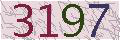

In [114]:
from PIL import Image
Image.open('captcha.jpg')

In [115]:
! pip install pytesseract

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [117]:
import pytesseract
print(pytesseract.image_to_string(Image.open('captcha.jpg')))

3197


In [118]:
payload = {
'do_s_1':'1',
'vKey':'fee348a7-0956-4e0b-ad87-46fccc837b5c',
'showMode':'1',
'city':'臺北市',
'change_city':'2',
'cityarea':'中山區',
'street':'南京東路２段',
'lane':'',
'alley':'',
'num':'137',
'num_hyphen':'',
'fl':'14',
'hyphen':'',
'suite':'',
'list':'true',
'checkImange':'8553',
'submit':'查詢',  
}
res2 = requests.post('https://www.post.gov.tw/post/internet/Postal/index.jsp?ID=207', data = payload, headers = headers)

In [123]:
payload = {
'do_s_1':'1',
'vKey':'fee348a7-0956-4e0b-ad87-46fccc837b5c',
'showMode':'1',
'city':'臺北市',
'change_city':'2',
'cityarea':'中山區',
'street':'玉門街',
'lane':'',
'alley':'',
'num':'1',
'num_hyphen':'',
'fl':'',
'hyphen':'',
'suite':'',
'list':'true',
'checkImange':'8553',
'submit':'查詢',  
}
res2 = requests.post('https://www.post.gov.tw/post/internet/Postal/index.jsp?ID=207', data = payload, headers = headers)

In [124]:
from bs4 import BeautifulSoup
soup2 = BeautifulSoup(res2.text, 'lxml')

In [125]:
soup2.select_one('#tb1 td').text

'No.1, Yumen St., Zhongshan Dist., Taipei City 104, Taiwan (R.O.C.)'

## 經濟部─公司及分公司基本資料查詢

In [18]:
import requests
headers = {
 'Cookie': 'JSESSIONID=451C9443D663EAAD2DE8CC85C025EB16',
 'Referer': 'https://serv.gcis.nat.gov.tw/pub/cmpy/cmpyInfoListAction.do;jsessionid=451C9443D663EAAD2DE8CC85C025EB16'   
}
res = requests.get('https://serv.gcis.nat.gov.tw/pub/kaptcha.jpg', headers = headers)
with open('kaptcha.jpg', 'wb') as f:
    f.write(res.content)

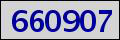

In [19]:
from PIL import Image
Image.open('kaptcha.jpg')

In [20]:
?pytesseract.image_to_string

In [39]:
import pytesseract
pytesseract.image_to_string(Image.open('kaptcha.jpg'))

'm\nm\n\n04'

In [38]:
import pytesseract
from PIL import Image
#pytesseract.pytesseract.tesseract_cmd = r'./tesseract'
print(pytesseract.image_to_string(Image.open('kaptcha.jpg'), \
                        boxes = False,
                        config='--psm 8 --oem 3 -c tessedit_char_whitelist=0123456789'))

## 抓取 PTT

In [41]:
import requests
cookies = {'over18':'1'}
res = requests.get('https://www.ptt.cc/bbs/Creditcard/index.html', cookies = cookies)

In [43]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')
#soup.select('.r-ent')

In [64]:
pagenum = int(soup.select('.btn')[3].get('href').split('index')[1].split('.html')[0])

In [66]:
for ele in range(pagenum, pagenum - 5, -1):
    print(ele)

2897
2896
2895
2894
2893


In [58]:
articles = []
domain = 'https://www.ptt.cc'
for ent in soup.select('.r-ent'):
    if ent.select_one('a'):
        article = {}
        article['cnt'] = ent.select_one('.nrec').text.strip()
        article['title'] = ent.select_one('.title').text.strip()
        article['link']   = domain + ent.select_one('a').get('href')
        article['author'] = ent.select_one('.author').text.strip()
        articles.append(article)
    #print(ent)
    #print('=============================')

In [59]:
import pandas
df = pandas.DataFrame(articles)
df

,author,cnt,link,title
0,q99663,X3,https://www.ptt.cc/bbs/creditcard/M.1544754989...,[問題] 國泰KOKO卡推薦人
1,mayyr,1,https://www.ptt.cc/bbs/creditcard/M.1544762112...,[問題] 請問koko的新戶禮500元回饋時間？
2,VampirePY,6,https://www.ptt.cc/bbs/creditcard/M.1544762736...,"[問題] 請推薦里程卡,謝謝"
3,rachmandavid,26,https://www.ptt.cc/bbs/creditcard/M.1544763418...,[心得] 聊聊2019小資現金回饋刷卡攻略~
4,usedata,1,https://www.ptt.cc/bbs/creditcard/M.1544764046...,"Re: [閒聊] 唯你獨享,國泰他行帳戶繳拿10元/抽獎"
5,MoonAthenaX,5,https://www.ptt.cc/bbs/creditcard/M.1488251491...,[公告] === 卡板板規 V8.0 === (2018/05/25修訂)
6,bboy0720,爆,https://www.ptt.cc/bbs/creditcard/M.1425488177...,[公告] 置底檢舉專區
7,MoonAthenaX,71,https://www.ptt.cc/bbs/creditcard/M.1425873650...,[情報] 各家銀行0800免付費電話
8,DarkRobert,爆,https://www.ptt.cc/bbs/creditcard/M.1528898930...,[心得] 小資族 日常消費 最優惠回饋 整理(11/08)


In [106]:
import requests
cookies = {'over18':'1'}
res = requests.get('https://www.ptt.cc/bbs/Creditcard/index.html', cookies = cookies)
soup = BeautifulSoup(res.text, 'lxml')

pagenum = int(soup.select('.btn')[3].get('href').split('index')[1].split('.html')[0])
articles = []
for p in range(pagenum, pagenum - 5, -1):
    res = requests.get('https://www.ptt.cc/bbs/Creditcard/index{}.html'.format(p), cookies = cookies)
    soup = BeautifulSoup(res.text, 'lxml')
    domain = 'https://www.ptt.cc'
    for ent in soup.select('.r-ent'):
        if ent.select_one('a'):
            article = {}
            article['cnt'] = ent.select_one('.nrec').text.strip()
            article['title'] = ent.select_one('.title').text.strip()
            article['link']   = domain + ent.select_one('a').get('href')
            article['author'] = ent.select_one('.author').text.strip()
            articles.append(article)
    print(p)

2897
2896
2895
2894
2893


In [107]:
import pandas
df = pandas.DataFrame(articles)
df.head(3)

,author,cnt,link,title
0,MONTECARLOO,24,https://www.ptt.cc/bbs/creditcard/M.1544668059...,[閒聊] 2019頂級卡，請推薦
1,KSchuang,3,https://www.ptt.cc/bbs/creditcard/M.1544671503...,Re: [閒聊] 2019頂級卡推薦
2,tengobo,8,https://www.ptt.cc/bbs/creditcard/M.1544671942...,[問題] 玉山pi錢包信用卡


In [70]:
res = requests.get('https://www.ptt.cc/bbs/creditcard/M.1544685460.A.38C.html')
soup = BeautifulSoup(res.text, 'lxml')

In [78]:
metadic = {}
for meta in soup.select('.article-metaline'):
    metadic[meta.select_one('.article-meta-tag').text] = meta.select_one('.article-meta-value').text

In [79]:
metadic

{'作者': 'LIN9 (LIN9)',
 '時間': 'Thu Dec 13 15:17:37 2018',
 '標題': '[新聞] 驚！明年5大信用卡狂砍優惠\u3000折現金、될'}

In [85]:
soup.select_one('#main-content').contents[4]

'\n新聞來源:蘋果\n\n新聞標題:驚！明年5大信用卡狂砍優惠\u3000折現金、換哩程統統縮水\n\n新聞內容:\n年底聖誕跨年到明年2月農曆過年消費高峰，但逢新舊年度交接，明年起信用卡權益再見\n縮水，多家銀行近日陸續公告新辦法，範圍從點數累積、紅利折抵、停車優惠等門檻的提\n高。\n\n花旗銀公布從明年1月27日起「饗樂生活卡」紅利折抵威秀影城消費，從每15點提高至20\n點才可以折抵1元；另包括「鑽石卡」、「超級紅利回饋卡」、「饗樂生活卡」等卡別同\n樣折抵王品集團旗下指定品牌餐廳也是提高至20點1元。\n\n另外花旗也規定明年1月27日起包含亞洲萬里通、中華、長榮、新加坡、泰國航空、及優\n悅會/IHG洲際酒店點數轉換3點＝1里數／會員積分變更成每6000點 = 1200里數／會員積\n分；若以目前來換算6000點可以換到2000里數／會員積分，新制兌換起點、可換里數門檻\n都大幅升高。\n\n凱基銀也公告從明年起信用卡在特店刷卡使用分期消費服務，不再計算現金回饋或紅利積\n點。新光銀對刷卡支付新光人壽從現行除傳統型續期保險費或投資型保單不計入計算外，\n從明年起所有保費都不能累積紅利或現金回饋。\n\n在停車部分，聯邦銀行微風聯名卡中針對微風「南京館」從明年起平日停車優惠加入必需\n消費規定，無限卡平假日加入「不限金額任刷一筆」才可以享停車優惠4小時，御璽、鈦\n金、晶緻卡平日消費需刷卡300元，白金卡平日消費需刷卡200元才可以享有停車優惠3小\n時，假日規範不變。\n\n國泰世華銀目前提供世界卡、無限卡國際機場外圍停車權益只要8成以上國外旅遊團費或\n機票就可以享有每次30天免費，但明年起規定單筆刷卡金額需達1萬元以上。至於商務卡\n、御璽卡、白金卡 等過去只對每次免費天數限7天，現新增一年僅限2次。\n\n王道銀行(2897)簽帳金融卡明年回饋也將大幅縮水，王道卡友原先祭出國內消費1.5%、海\n外消費2.3%現金回饋無上限，但明年起僅享1%無上限。若是滿足條件的加碼回饋，亦修改\n為國內消費僅1.3%，海外減少至1.8%回饋金。\n\n中國信託商銀的LINE Pay信用卡，現一般消費可享最高LINE Points2%點數回饋，1點等同\n於現金1元，且線上線下合計超過5萬個支付點，但明年傳出回饋要從2%縮水至1%。（林潔\n禎／台北報導）\n\

In [86]:
soup.select_one('#main-content').contents[5]

<a href="https://goo.gl/k8Sszi" rel="nofollow" target="_blank">https://goo.gl/k8Sszi</a>

In [87]:
soup.select_one('#main-content').contents[6]

'\n\n\n--\n'

In [104]:
maincontent = soup.select_one('#main-content')
article_contents = []
for c in maincontent.contents[4:]:
    #print(str(c))
    if str(c).strip() == '--':
        break
    article_contents.append(str(c).strip())

In [105]:
' '.join(article_contents)

'新聞來源:蘋果\n\n新聞標題:驚！明年5大信用卡狂砍優惠\u3000折現金、換哩程統統縮水\n\n新聞內容:\n年底聖誕跨年到明年2月農曆過年消費高峰，但逢新舊年度交接，明年起信用卡權益再見\n縮水，多家銀行近日陸續公告新辦法，範圍從點數累積、紅利折抵、停車優惠等門檻的提\n高。\n\n花旗銀公布從明年1月27日起「饗樂生活卡」紅利折抵威秀影城消費，從每15點提高至20\n點才可以折抵1元；另包括「鑽石卡」、「超級紅利回饋卡」、「饗樂生活卡」等卡別同\n樣折抵王品集團旗下指定品牌餐廳也是提高至20點1元。\n\n另外花旗也規定明年1月27日起包含亞洲萬里通、中華、長榮、新加坡、泰國航空、及優\n悅會/IHG洲際酒店點數轉換3點＝1里數／會員積分變更成每6000點 = 1200里數／會員積\n分；若以目前來換算6000點可以換到2000里數／會員積分，新制兌換起點、可換里數門檻\n都大幅升高。\n\n凱基銀也公告從明年起信用卡在特店刷卡使用分期消費服務，不再計算現金回饋或紅利積\n點。新光銀對刷卡支付新光人壽從現行除傳統型續期保險費或投資型保單不計入計算外，\n從明年起所有保費都不能累積紅利或現金回饋。\n\n在停車部分，聯邦銀行微風聯名卡中針對微風「南京館」從明年起平日停車優惠加入必需\n消費規定，無限卡平假日加入「不限金額任刷一筆」才可以享停車優惠4小時，御璽、鈦\n金、晶緻卡平日消費需刷卡300元，白金卡平日消費需刷卡200元才可以享有停車優惠3小\n時，假日規範不變。\n\n國泰世華銀目前提供世界卡、無限卡國際機場外圍停車權益只要8成以上國外旅遊團費或\n機票就可以享有每次30天免費，但明年起規定單筆刷卡金額需達1萬元以上。至於商務卡\n、御璽卡、白金卡 等過去只對每次免費天數限7天，現新增一年僅限2次。\n\n王道銀行(2897)簽帳金融卡明年回饋也將大幅縮水，王道卡友原先祭出國內消費1.5%、海\n外消費2.3%現金回饋無上限，但明年起僅享1%無上限。若是滿足條件的加碼回饋，亦修改\n為國內消費僅1.3%，海外減少至1.8%回饋金。\n\n中國信託商銀的LINE Pay信用卡，現一般消費可享最高LINE Points2%點數回饋，1點等同\n於現金1元，且線上線下合計超過5萬個支付點，但明年傳出回饋要從2%縮水至1%。（林潔\n禎／台北報導）\n\n新

In [116]:
def getArticle(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'lxml')
    dic = {}
    for meta in soup.select('.article-metaline'):
        dic[meta.select_one('.article-meta-tag').text] = meta.select_one('.article-meta-value').text
    maincontent = soup.select_one('#main-content')
    article_contents = []
    for c in maincontent.contents[4:]:
        article_contents.append(str(c).strip()) 
        if '--' in str(c).strip():
            break
    dic['content'] = ' '.join(article_contents)
    return dic

In [118]:
getArticle('https://www.ptt.cc/bbs/creditcard/M.1544668059.A.C5F.html')

{'content': '修改了標題，我是希望大家推薦，不是我要推薦啦~XP\n\n這幾天在幫家人挑選適合的頂卡，主要看的是機場接送/貴賓室/市區停車/免年費資格幾\n項，申請者的年收200~300，應該都符合申請門檻，但免年費的認定含稅不含稅就差異很\n大了（希望可用稅養）\n\n鎖定了以下幾張：\n\n● 中信鼎極：年消費36萬認定含稅，年收符合又是薪轉户，雖然權益縮水，原本以為最\n容易，但後來發現現在取消首年免年費（需符合某些條件)，後來就殘念了\n\n●  玉山世界：申請與年費門檻都算低，貴賓室使用條件也不難（六個月內刷機票團費，\n前一個月消費5000)，但機場接送要刷滿兩萬，日本線很容易達不到，這張應該會申請來\n備用 （但看板上說2019權益會再縮……要觀望）\n\n● 日盛無限：網頁上就可下載申請書，免年費門檻是很硬的一般消費30萬，但貴賓室機\n場接送只要三個月內刷，都沒金額限制，停車也是上期有新增消費即可，如果2019權益不\n改，還不錯\n\n● 富邦世界（或尊御世界）\n這兩張差在免年費認定前者含稅後者不含，其實如果使用量不大，刷6000就可以使用貴賓\n室跟接送，世界卡容易養，尊御適合出國中度使用者，但是……昨天收到理專通知，我自\n己使用中的尊御修改了2019權益，看完後覺得如果尊御都這樣，世界卡應該也會再縮……\n（觀望中） <a href="https://i.imgur.com/KB6hJO8.jpg" rel="nofollow" target="_blank">https://i.imgur.com/KB6hJO8.jpg</a>  <div class="richcontent"><blockquote class="imgur-embed-pub" data-id="KB6hJO8" lang="en"><a href="//imgur.com/KB6hJO8"></a></blockquote><script async="" charset="utf-8" src="//s.imgur.com/min/embed.js"></script></div> 請問還有沒有比較推薦或值得注意的頂卡呢？ 先謝謝各位前輩了~\n\n--',
 '作者': 'MONTECARLOO (快樂是最重要的)',
 '時間': 'Thu D

In [ ]:
totalarticles = []
for ele in articles:
    totalarticles.append(getArticle(ele.get('link')))

In [ ]:
import pandas
totaldf = pandas.DataFrame(totalarticles)
totaldf